# ***Numerical Column Analysis***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa = pd.read_csv(r"C:\Users\prath\FullStackDataScience\my own folder\database\data_files\Visadataset.csv")
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
num = visa.select_dtypes(exclude="str").columns.tolist()
num

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

## **Prewailing wage**

        - count
        - mean
        - median
        - 25p
        - 50p
        - 75p
        - min
        - max
        - std

In [4]:
visa["prevailing_wage"].size

25480

In [5]:
visa["prevailing_wage"].mean()

np.float64(74455.81459209183)

In [6]:
visa["prevailing_wage"].median()

np.float64(70308.20999999999)

In [ ]:
np.percentile(visa["prevailing_wage"], 25)

# 25 % of the data is less then this value

np.float64(34015.479999999996)

In [8]:
np.percentile(visa["prevailing_wage"], 50)

np.float64(70308.20999999999)

In [9]:
np.percentile(visa["prevailing_wage"], 75)

np.float64(107735.51250000001)

In [10]:
visa["prevailing_wage"].min()

np.float64(2.1367)

In [11]:
visa["prevailing_wage"].max()

np.float64(319210.27)

In [ ]:
visa["prevailing_wage"].std()

np.float64(52815.94232687371)

In [19]:
# creating the data Frame : 

idx = ["count", "mean", "median", "25p", "50p", "75p", "min", "max", "std"]
data = {}
for i in num :
    series = visa[i]
    count = visa[i].size
    mean = visa[i].mean()
    median = visa[i].median()
    p_25 = np.percentile(visa[i], 25)
    p_50 = np.percentile(visa[i], 50)
    p_75 = np.percentile(visa[i], 75)
    mini = visa[i].min()
    maxi = visa[i].max() 
    std = visa[i].std()
    entry = [count, mean, median, p_25, p_50, p_75, mini, maxi, std]
    data[f"{i}"] = entry


df = pd.DataFrame(data, index = idx)
df

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
median,2109.000000,1997.000000,70308.210000
25p,1022.000000,1976.000000,34015.480000
50p,2109.000000,1997.000000,70308.210000
75p,3504.000000,2005.000000,107735.512500
min,-26.000000,1800.000000,2.136700
max,602069.000000,2016.000000,319210.270000
std,22877.928848,42.366929,52815.942327


In [22]:
visa[num].describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [23]:
visa[visa["prevailing_wage"] < np.percentile(visa["prevailing_wage"], 50)]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
7,EZYV08,North America,Bachelor's,Y,N,3035,1924,West,418.2298,Hour,Y,Denied
9,EZYV10,Europe,Doctorate,Y,N,2251,1995,South,67514.7600,Year,Y,Certified
12,EZYV13,Asia,Bachelor's,Y,N,123876,1963,Northeast,28663.0500,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25465,EZYV25466,North America,High School,N,N,2577,1995,South,481.2238,Hour,Y,Certified
25466,EZYV25467,Europe,Bachelor's,Y,N,1938,2005,West,6973.4000,Year,Y,Denied
25470,EZYV25471,North America,Master's,Y,N,2272,1970,Northeast,516.4101,Hour,Y,Certified
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified


In [24]:
visa[visa["prevailing_wage"] < np.percentile(visa["prevailing_wage"], 75)]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


# Emperical Formula (68 - 95 - 99.7)

        - u-1*sigma to u+1*sigma == 68% 

In [30]:
u = visa["prevailing_wage"].mean()
std = visa["prevailing_wage"].std()

In [32]:
df = visa[(visa["prevailing_wage"] > (u - std)) & (visa["prevailing_wage"] < (u + std))]
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.56,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.78,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [28]:
visa[visa["prevailing_wage"] < np.percentile(visa["prevailing_wage"], 68)]


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25473,EZYV25474,Asia,Bachelor's,Y,N,2421,2007,Northeast,22845.5600,Year,Y,Certified
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [37]:
u = visa["prevailing_wage"].mean()
std = visa["prevailing_wage"].std()

lst = [68, 95, 99.7]
res = {}

for i in range(1, 4) :
    df = visa[(visa["prevailing_wage"] > (u - i*std)) & (visa["prevailing_wage"] < (u + i*std))]
    org_df = visa[visa["prevailing_wage"] < np.percentile(visa["prevailing_wage"], lst[i-1])]
    print("mannual len : ", len(df), "--> original len : ", len(org_df), "--> Comparison: ", len(df)==len(org_df))
    res[lst[i-1]] = (len(df) == len(org_df))

print("result\n",  res)

mannual len :  17171 --> original len :  17326 --> Comparison:  False
mannual len :  24582 --> original len :  24206 --> Comparison:  False
mannual len :  25186 --> original len :  25403 --> Comparison:  False
result
 {68: False, 95: False, 99.7: False}


<BarContainer object of 10 artists>

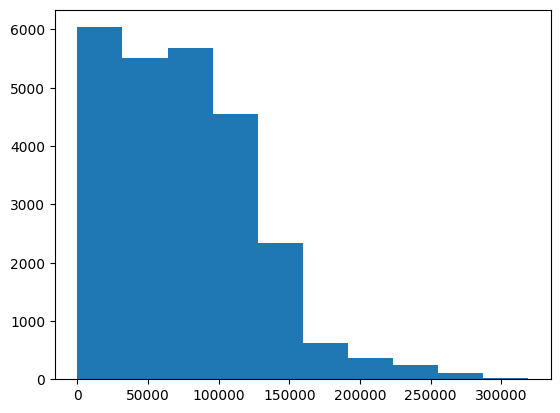

In [45]:
values, interval, p = plt.hist(visa["prevailing_wage"])
p

In [46]:
interval

array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
       1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
       2.55368643e+05, 2.87289457e+05, 3.19210270e+05])

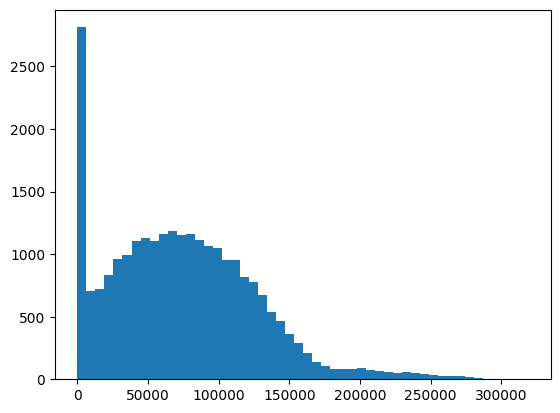

In [48]:
values, interval, p = plt.hist(visa["prevailing_wage"], bins = 50)


In [49]:
values

array([2813.,  708.,  725.,  832.,  960.,  993., 1109., 1132., 1108.,
       1162., 1184., 1154., 1159., 1117., 1067., 1047.,  953.,  955.,
        816.,  780.,  673.,  539.,  469.,  364.,  289.,  211.,  139.,
        107.,   81.,   86.,   79.,   87.,   78.,   69.,   60.,   49.,
         57.,   52.,   45.,   37.,   28.,   27.,   26.,   20.,   13.,
          4.,    5.,    4.,    4.,    4.])

In [50]:
interval

array([2.13670000e+00, 6.38629937e+03, 1.27704620e+04, 1.91546247e+04,
       2.55387874e+04, 3.19229500e+04, 3.83071127e+04, 4.46912754e+04,
       5.10754380e+04, 5.74596007e+04, 6.38437634e+04, 7.02279260e+04,
       7.66120887e+04, 8.29962514e+04, 8.93804140e+04, 9.57645767e+04,
       1.02148739e+05, 1.08532902e+05, 1.14917065e+05, 1.21301227e+05,
       1.27685390e+05, 1.34069553e+05, 1.40453715e+05, 1.46837878e+05,
       1.53222041e+05, 1.59606203e+05, 1.65990366e+05, 1.72374529e+05,
       1.78758691e+05, 1.85142854e+05, 1.91527017e+05, 1.97911179e+05,
       2.04295342e+05, 2.10679505e+05, 2.17063667e+05, 2.23447830e+05,
       2.29831993e+05, 2.36216155e+05, 2.42600318e+05, 2.48984481e+05,
       2.55368643e+05, 2.61752806e+05, 2.68136969e+05, 2.74521131e+05,
       2.80905294e+05, 2.87289457e+05, 2.93673619e+05, 3.00057782e+05,
       3.06441945e+05, 3.12826107e+05, 3.19210270e+05])

In [53]:
# rounding off intervals least bound and upper bound

lb = round(2.13670000e+00)
ub = round(6.38629937e+03)

In [55]:
visa[(visa["prevailing_wage"] > lb) & (visa["prevailing_wage"] < ub)].shape[0]

2813

        + from mean-median, empirical rule and histogram we can conclud data does not follow normal distribution
        + 

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd21553cb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd215c4050>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd21553b60>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd215c42f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd215c4440>],
 'means': []}

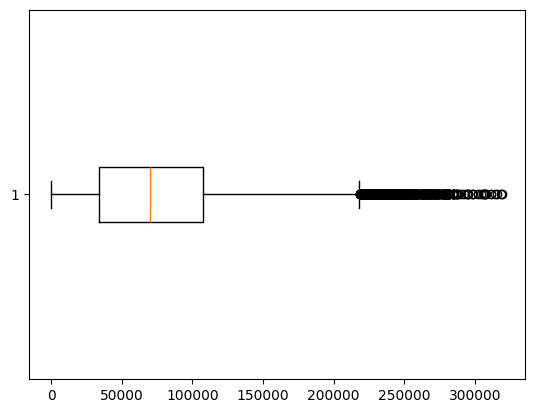

In [ ]:
plt.boxplot(visa["prevailing_wage"], vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x1cd215c78c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cd215c7b60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cd215c7770>],
 'medians': [<matplotlib.lines.Line2D at 0x1cd215c7e00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cd25638050>],
 'means': []}

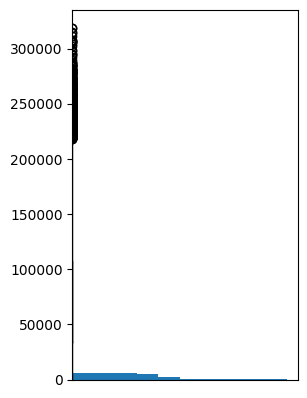

In [60]:
plt.subplot(1,2,1).hist(visa["prevailing_wage"])
plt.subplot(1,2,1).boxplot(visa["prevailing_wage"])